In [3]:
# import librairies

import pandas as pd
import numpy as np
import scipy
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection  import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
# import dataframe

work = pd.read_csv('C:/Users/Claire/Downloads/Project_W7_Absenteisme/Absenteeism_at_work.csv', sep=';')
work.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [58]:
work.shape

(740, 21)

In [26]:
#check the type

work.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [27]:
# check for null

work.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [11]:
work.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014D94E9D0F0>]],
      dtype=object)

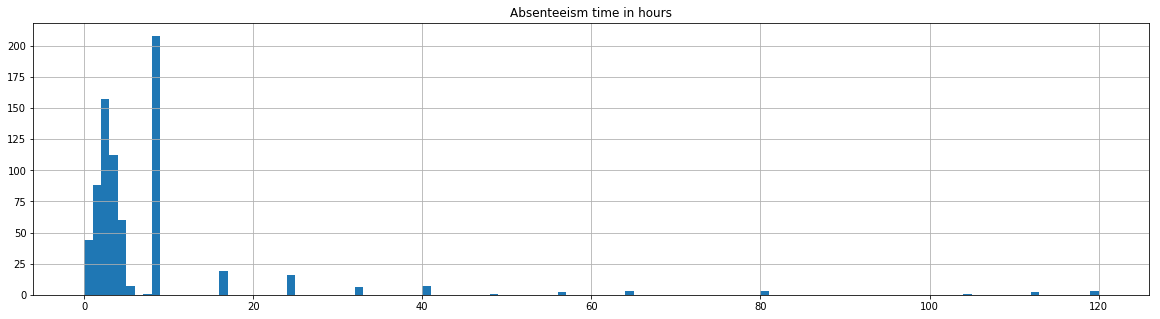

In [21]:
#plot number of hours off

work.hist(column=['Absenteeism time in hours'], bins=120, figsize=(20,5))

In [59]:
# the line with over 10h of absenteeism because they are considered to be outlayers

work = work[work['Absenteeism time in hours']<11]
work.shape

(677, 21)

In [3]:
# work.set_index('ID', drop=True, inplace=True)
# work.head()

In [28]:
# build plot

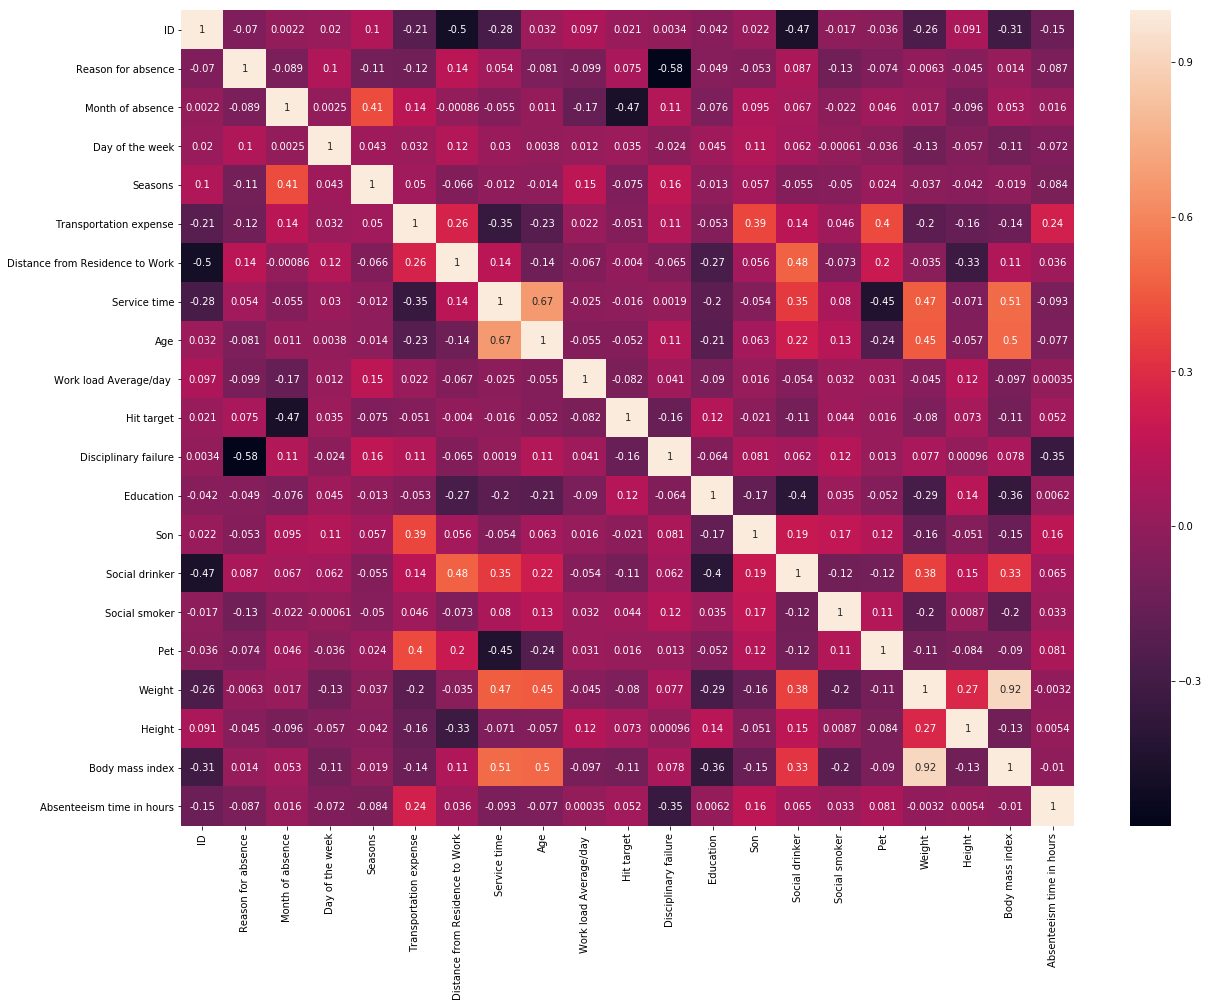

In [60]:
# heatmap made bigger with annotations

plt.subplots(figsize=(20,15))
sns.heatmap(work.corr(), annot = True)

In [62]:
# assign X and y

X = work.drop(columns=['Absenteeism time in hours'], axis = 1)
y = work['Absenteeism time in hours']

In [63]:
# RFE

from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, 3, step=1)
selector = selector.fit(X, y)
selector.support_ 

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False])

In [64]:
selector.ranking_

array([11,  2, 14, 12, 10, 15, 17,  8, 16, 18, 13,  1,  4,  1,  1,  3,  9,
        7,  6,  5])

In [69]:
to_keep=work.columns[[12, 14, 15, 20]]
to_keep

Index(['Education', 'Social drinker', 'Social smoker',
       'Absenteeism time in hours'],
      dtype='object')

In [70]:
work1 = work[to_keep]
work1.head()

,Education,Social drinker,Social smoker,Absenteeism time in hours
0,1,1,0,4
1,1,1,0,0
2,1,1,0,2
3,1,1,1,4
4,1,1,0,2


In [71]:
# assign X and y

X = work.drop(columns=['Absenteeism time in hours'], axis = 1)
y = work['Absenteeism time in hours']

In [72]:
# build a train test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [73]:
# create a linear model

model_lin  = LinearRegression()
reg_lin = model_lin.fit(X_train, y_train)
reg_lin

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
# print info

print(model_lin.intercept_)
print(model_lin.coef_)

46.565703516391196
[-4.38543630e-02 -1.42456565e-01 -7.34208731e-03 -3.22527939e-02
 -7.81548498e-02  8.80375162e-03 -1.33190500e-02 -1.26437535e-01
 -8.11444265e-03 -8.51662713e-04  1.91657917e-02 -7.89918707e+00
 -5.98628397e-02  2.66743209e-01  2.98287570e-01  1.07830350e+00
 -3.01087652e-01  2.80881631e-01 -2.48556104e-01 -7.13517613e-01]


In [75]:
y_pred_lin = reg_lin.predict(X_test)

array([ 0.10197828,  3.3505038 ,  2.32295874,  3.15265222,  3.75953451,
        3.0652679 ,  3.23732083,  5.98170012,  5.27301082,  4.92777172,
        3.01122369,  4.88760429,  3.08894192,  3.20836238,  4.65579019,
        4.33255517,  2.42896447,  3.32332312,  5.8482799 ,  5.9173796 ,
        5.80684927,  4.61653859,  5.73495668,  8.03300094, -0.25313038,
        4.74451297,  7.95316035,  3.5038242 ,  5.44707581,  3.3037831 ,
        5.07046436,  2.3077831 ,  3.49022965,  2.74450634,  3.16353693,
        4.08601651,  4.56065275,  5.79057233,  3.874235  ,  5.5859988 ,
        2.99879073,  3.55126047,  5.91385985,  2.72954612,  3.96164085,
        6.85255916,  3.16432516,  4.43208793,  3.2644735 ,  2.35781001,
        3.72982318, -1.97646786,  3.55303321,  2.16962294,  2.87775106,
        4.52793248,  4.29444981,  3.5286359 ,  5.90736152,  3.03442689,
        7.20018762,  4.25288369,  4.38540981,  3.03878995,  4.54500288,
        5.49907043,  5.53123371,  4.74324645,  5.76490496,  3.76

In [76]:
# ne s'applique pas car pour classification
#     confusion_matrix(y_test, y_pred_lin)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [77]:
# create a logistic model

model_log  = LogisticRegression()
log = model_log.fit(X_train, y_train)
log

C:\Users\Claire\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Claire\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [78]:
y_pred_log = log.predict(X_test)

In [79]:
confusion_matrix(y_test, y_pred_log)

array([[ 9,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  4,  3,  0,  0,  0,  8],
       [ 0,  2, 24,  6,  0,  0,  0,  2],
       [ 0,  2, 10,  3,  0,  0,  0,  7],
       [ 0,  0,  6,  2,  1,  0,  0,  5],
       [ 0,  0,  1,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  3,  3,  0,  1,  0,  0, 31]], dtype=int64)

In [80]:
accuracy_score(y_test, y_pred_log)

0.5073529411764706

In [85]:
# KNN Model 

from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)

In [43]:
y_train.unique().shape

(18,)

In [86]:
y_pred_knn = knn_model.predict(X_test)

In [89]:
y_pred_knn

array([5.33333333, 2.33333333, 2.33333333, 4.66666667, 1.33333333,
       2.33333333, 2.33333333, 8.        , 6.        , 4.33333333,
       3.33333333, 3.33333333, 3.        , 1.66666667, 4.66666667,
       3.        , 2.33333333, 3.        , 5.33333333, 6.66666667,
       3.33333333, 5.66666667, 2.        , 4.        , 2.66666667,
       6.        , 6.66666667, 8.        , 6.        , 4.66666667,
       1.66666667, 3.33333333, 3.        , 3.33333333, 6.        ,
       6.33333333, 6.33333333, 6.        , 2.        , 5.66666667,
       2.33333333, 2.33333333, 6.33333333, 2.        , 4.33333333,
       8.        , 2.66666667, 1.66666667, 2.33333333, 2.        ,
       2.        , 0.        , 6.        , 2.        , 1.66666667,
       8.        , 6.33333333, 1.66666667, 8.        , 4.33333333,
       8.        , 4.        , 6.33333333, 3.        , 1.66666667,
       6.66666667, 3.33333333, 2.33333333, 8.        , 2.33333333,
       1.66666667, 2.66666667, 3.        , 5.33333333, 1.     

In [87]:
confusion_matrix(y_test, y_pred_knn)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [88]:
accuracy_score(y_test, y_pred_knn)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets